# <p style="background-color:#E6F7FF; font-family:'Comic Sans MS', cursive; font-weight:bold; color:#1192AA; font-size:100%; text-align:center; border: 1px solid #003366; border-radius:10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 51, 102, 0.2);">📜 About the Completition</p>

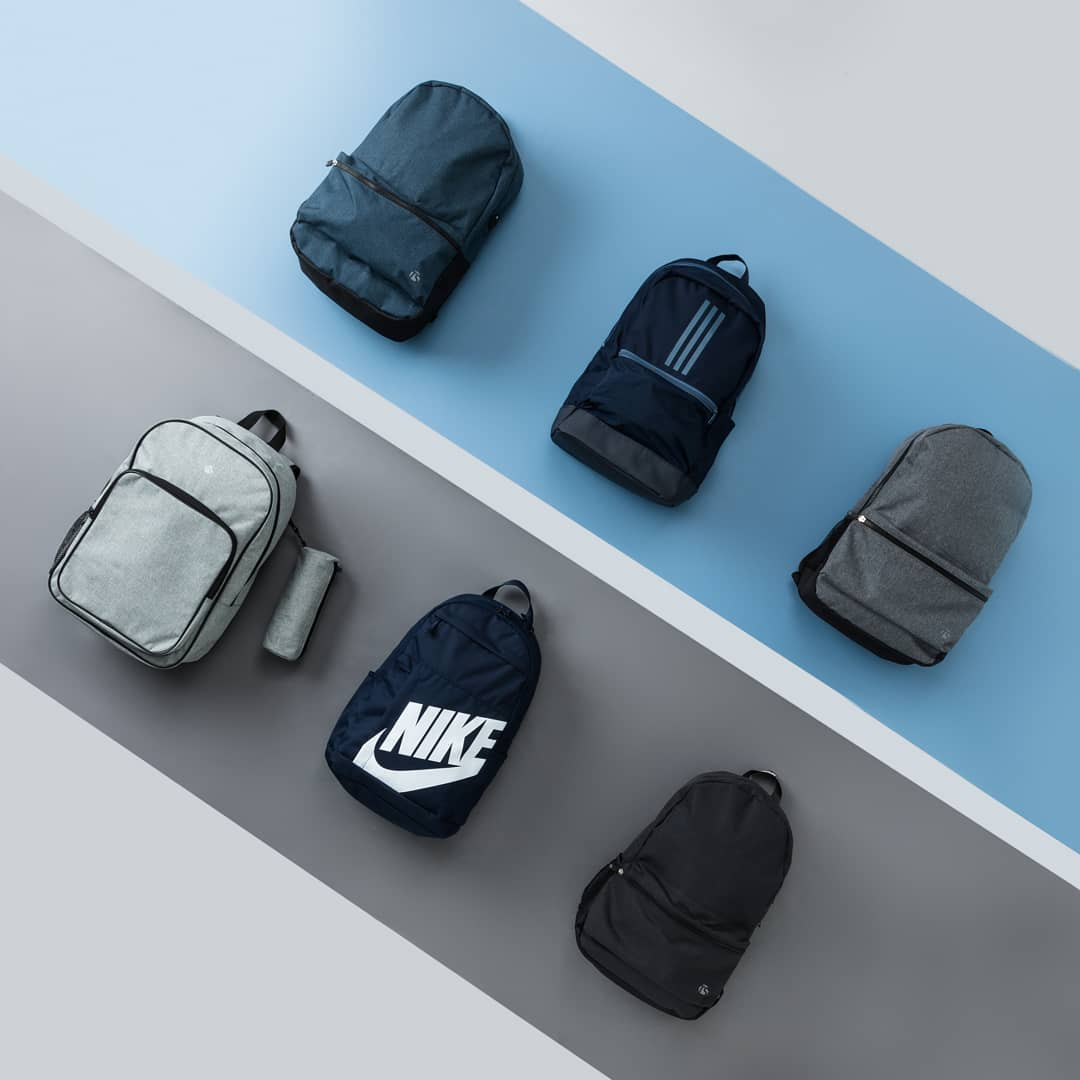

## 📌 Overview
Welcome to the **2025 Kaggle Playground Series**! This competition provides an **approachable dataset** for the community to practice **machine learning skills**, with a new challenge each month.

Your task: **Predict the price of backpacks** based on various attributes.

## 📊 Evaluation Metric
Submissions are evaluated using **Root Mean Squared Error (RMSE)**:

$RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2}$

where:
- $y_i$ = actual price
- $\hat{y}_i$ = predicted price

A **lower RMSE** indicates better performance.

## 📅 Timeline
- **Start Date:** February 1, 2025  
- **Final Submission Deadline:** February 28, 2025 (11:59 PM UTC)  
- **Team Merger Deadline:** February 28, 2025  

The competition timeline may be updated at the organizers' discretion.

## 📦 About the Tabular Playground Series
This series offers **lightweight, synthetic datasets** for hands-on practice in **data science and machine learning**. It allows quick iteration on:
- **Exploratory Data Analysis (EDA)**
- **Feature Engineering**
- **Model Development & Optimization**

The datasets are **synthetically generated** from real-world data, ensuring **realistic feature distributions** while preventing public test labels.

## 🎯 Notebook Goal
This notebook will cover:

✅ **Exploratory Data Analysis (EDA)** to uncover insights  
✅ **Feature Engineering** to enhance model performance  
✅ **Baseline Model** using an **ensemble approach** for robust predictions  

## 🔗 Useful Links (TBU)
- [Competition Page](https://www.kaggle.com/competitions/playground-series-s5e2)
- [Discussion Forum](https://www.kaggle.com/competitions/playground-series-s5e2/discussion?sort=published)
- [Kaggle Notebooks](https://www.kaggle.com/competitions/playground-series-s5e2/code)

---



# <p style="background-color:#E6F7FF; font-family:'Comic Sans MS', cursive; font-weight:bold; color:#1192AA; font-size:100%; text-align:center; border: 1px solid #003366; border-radius:10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 51, 102, 0.2);">📜 About the Dataset</p>

## 📊 Brief overview of the columns:

| Column                  | Description |
|-------------------------|-------------|
| **id**                  | Unique identifier for each backpack |
| **Brand**               | Brand name of the backpack |
| **Material**            | Primary material used (e.g., nylon, leather, canvas) |
| **Size**                | General size category (e.g., small, medium, large) |
| **Compartments**        | Number of compartments in the backpack |
| **Laptop Compartment**  | Indicates whether there is a dedicated laptop compartment (Yes/No) |
| **Waterproof**          | Whether the backpack is waterproof (Yes/No) |
| **Style**               | Type of backpack (e.g., tole, messenger, backpack) |
| **Color**               | Color of the backpack |
| **Weight Capacity (kg)** | Maximum weight the backpack can carry |
| **Price**               | Target variable – the price of the backpack (to be predicted) |

## 📂 Dataset Files
- **`train.csv`** 📄 – Training dataset containing backpack features along with their corresponding prices (our target variable).
- **`test.csv`** 📄 – Test dataset where we need to predict the price based on given features.
- **`sample_submission.csv`** 📄 – A sample submission file in the correct format.
- **`training_extra.csv`** 📄 – Additional data available for training.

## 🧐 Key Considerations
- **Categorical Features:** Brand, Material, Size, Style, Color, Laptop Compartment, and Waterproof.
- **Numerical Features:** Compartments, Weight Capacity (kg), and Price.
- **Target Variable:** `Price`, which we aim to predict.

This dataset allows for a variety of **feature engineering** opportunities, such as encoding categorical variables, handling missing values, and exploring relationships between features.

---


# <p style="background-color:#E6F7FF; font-family:'Comic Sans MS', cursive; font-weight:bold; color:#1192AA; font-size:100%; text-align:center; border: 1px solid #003366; border-radius:10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 51, 102, 0.2);">📜 Import</p>

In [1]:
# Misc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import random
import os
import gc
import warnings
import time
from typing import List

# Sklearn classes for model selection, cross validation, and performance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder


# Hypertuning
import optuna

# Gradient boosting
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from catboost import CatBoost, CatBoostRegressor
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from copy import deepcopy
from sklearn.metrics import mean_squared_error

# Seaborn
rc = {
    #FAEEE9
    "axes.facecolor": "#243139",
    "figure.facecolor": "#243139",
    "axes.edgecolor": "#000000",
    "grid.color": "#000000",
    "font.family": "arial",
    "axes.labelcolor": "#FFFFFF",
    "xtick.color": "#FFFFFF",
    "ytick.color": "#FFFFFF",
    "grid.alpha": 0.4,
}
sns.set(rc=rc)
#sns.set_palette("YlOrRd")

# Useful line of code to set the display option so we could see all the columns in pd dataframe
pd.set_option('display.max_columns', None)

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Functions
def print_sl():
    print("=" * 50)
    print()

# <p style="background-color:#E6F7FF; font-family:'Comic Sans MS', cursive; font-weight:bold; color:#1192AA; font-size:100%; text-align:center; border: 1px solid #003366; border-radius:10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 51, 102, 0.2);">📜 Dataset Overview</p>

In [2]:
# Load Data
train_PATH    = '/kaggle/input/playground-series-s5e2/train.csv'
train_ex_PATH = '/kaggle/input/playground-series-s5e2/training_extra.csv'
test_PATH     = '/kaggle/input/playground-series-s5e2/test.csv'
sub_PATH      = '/kaggle/input/playground-series-s5e2/sample_submission.csv'

train_df    = pd.read_csv(train_PATH)
train_ex_df = pd.read_csv(train_ex_PATH)
test_df   = pd.read_csv(test_PATH)
sub_df    = pd.read_csv(sub_PATH)

train_df.drop('id',axis=1,inplace=True)
train_ex_df.drop('id',axis=1,inplace=True)
test_df.drop('id',axis=1,inplace=True)

print('Data Loaded Succesfully!')
print_sl()

# Fast Data Check
print(f'Train Data Shape: {train_df.shape}')
print(f'Are there any null values in train? - {train_df.isnull().any().any()}\n')

print(f'Train Data Shape: {train_ex_df.shape}')
print(f'Are there any null values in train? - {train_ex_df.isnull().any().any()}\n')

print(f'Test Data Shape:  {test_df.shape}')
print(f'Are there any null values in test? - {test_df.isnull().any().any()}\n')
print_sl()

# Traget
target = 'Price'

train_df.head()

Data Loaded Succesfully!

Train Data Shape: (300000, 10)
Are there any null values in train? - True

Train Data Shape: (3694318, 10)
Are there any null values in train? - True

Test Data Shape:  (200000, 9)
Are there any null values in test? - True




,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


# <p style="background-color:#E6F7FF; font-family:'Comic Sans MS', cursive; font-weight:bold; color:#1192AA; font-size:100%; text-align:center; border: 1px solid #003366; border-radius:10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 51, 102, 0.2);">📜 EDA</p>

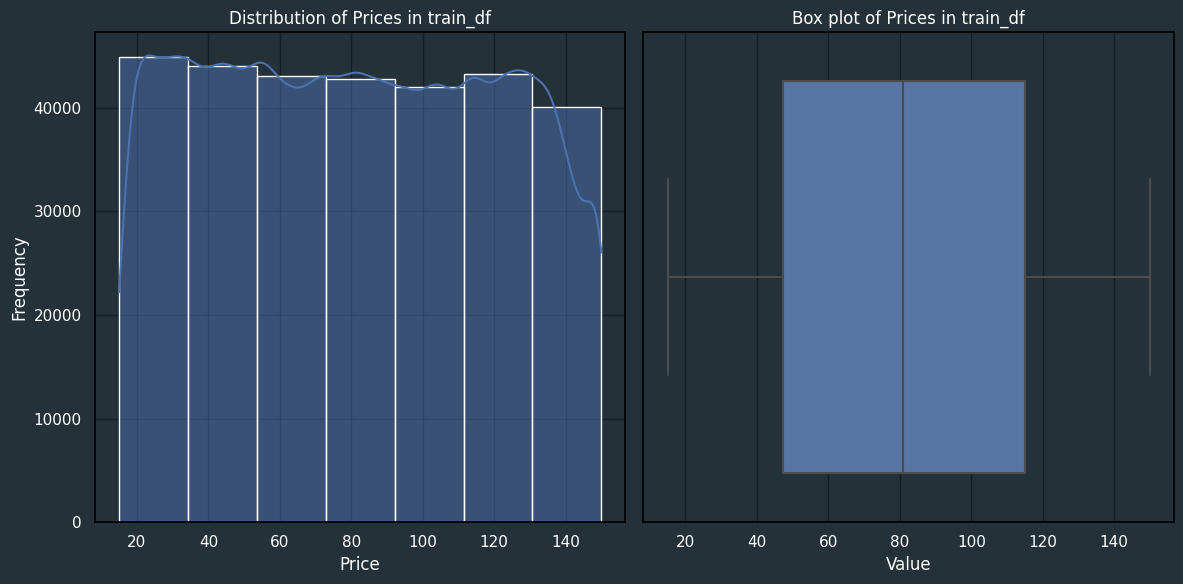

In [3]:
# Adjust the figure and axes creation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram plot
sns.histplot(train_df[target], bins=7, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Prices in train_df', color='white')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(x=train_df[target], ax=axes[1])
axes[1].set_title('Box plot of Prices in train_df', color='white')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

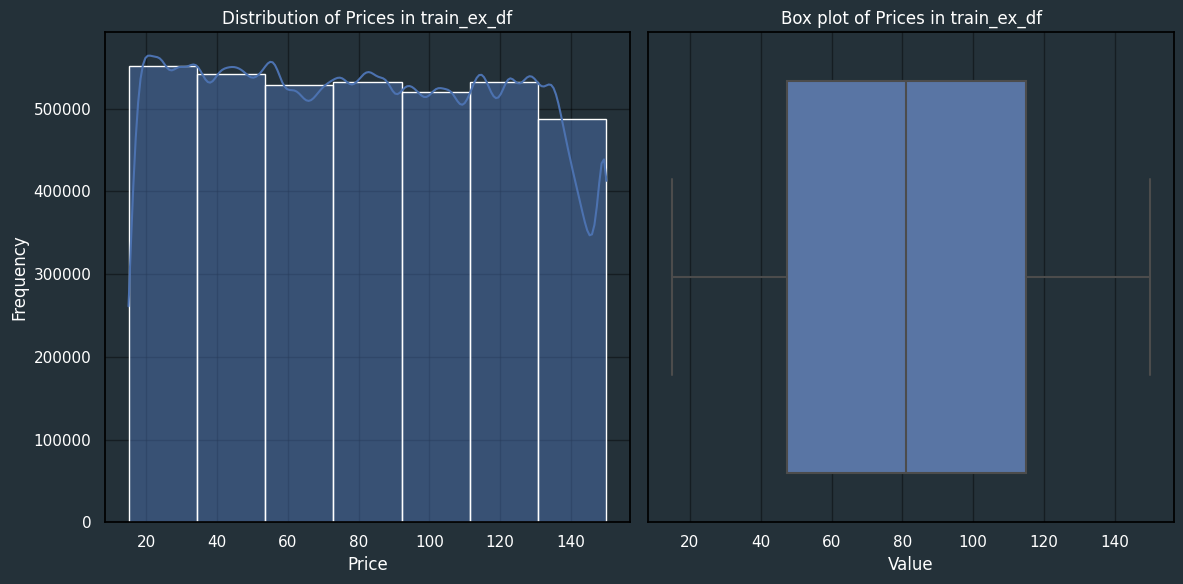

In [4]:
# Adjust the figure and axes creation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram plot
sns.histplot(train_ex_df[target], bins=7, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Prices in train_ex_df', color='white')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(x=train_ex_df[target], ax=axes[1])
axes[1].set_title('Box plot of Prices in train_ex_df', color='white')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [5]:
train_ex_df['Compartments'].unique()

array([10.,  4.,  8.,  7.,  9.,  5.,  6.,  2.,  3.,  1.])

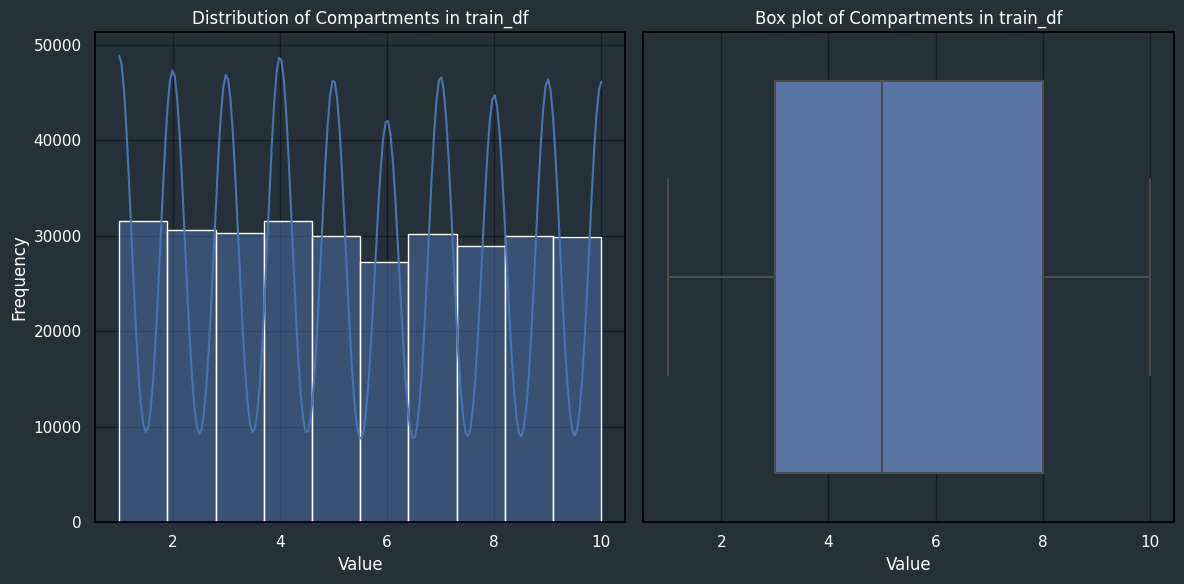

In [6]:
# Adjust the figure and axes creation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram plot
sns.histplot(train_df['Compartments'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Compartments in train_df', color='white')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(x=train_df['Compartments'], ax=axes[1])
axes[1].set_title('Box plot of Compartments in train_df', color='white')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

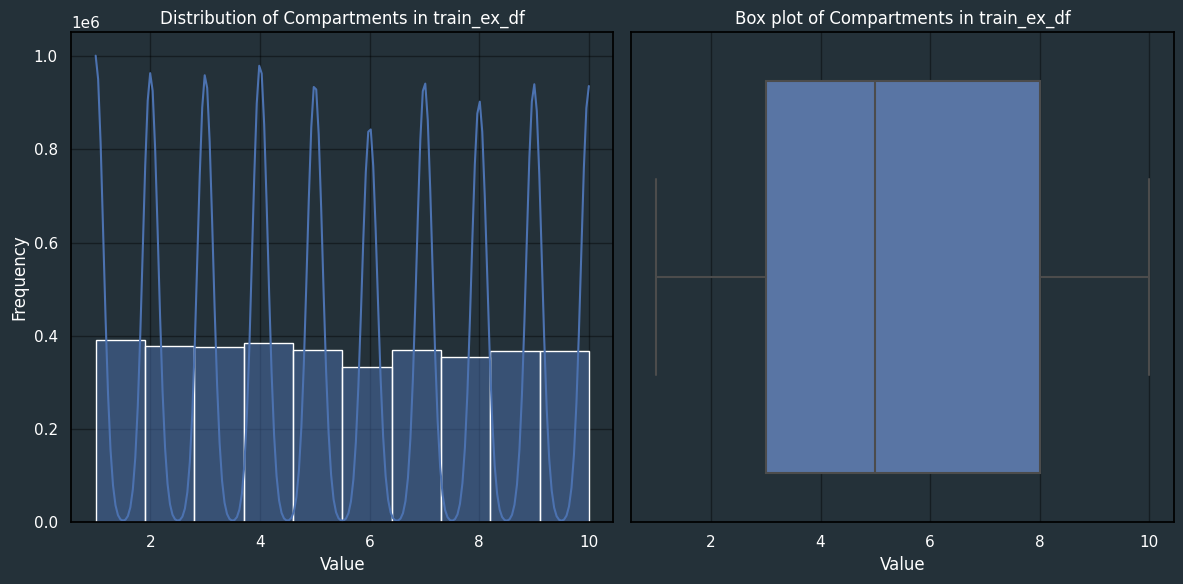

In [7]:
# Adjust the figure and axes creation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram plot
sns.histplot(train_ex_df['Compartments'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Compartments in train_ex_df', color='white')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(x=train_ex_df['Compartments'], ax=axes[1])
axes[1].set_title('Box plot of Compartments in train_ex_df', color='white')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

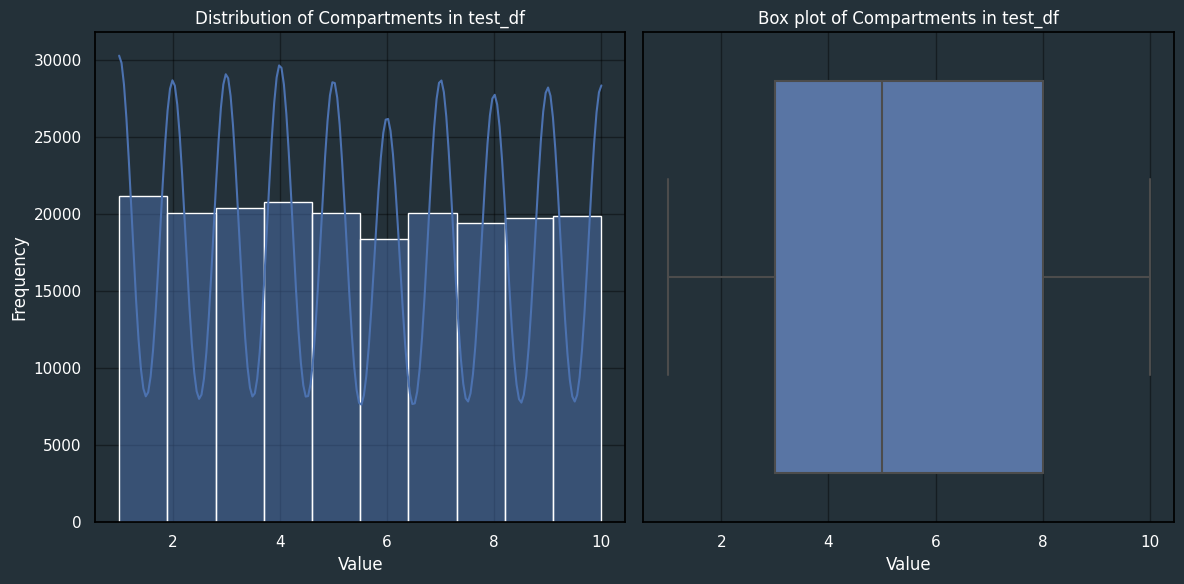

In [8]:
# Adjust the figure and axes creation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram plot
sns.histplot(test_df['Compartments'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Compartments in test_df', color='white')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(x=test_df['Compartments'], ax=axes[1])
axes[1].set_title('Box plot of Compartments in test_df', color='white')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

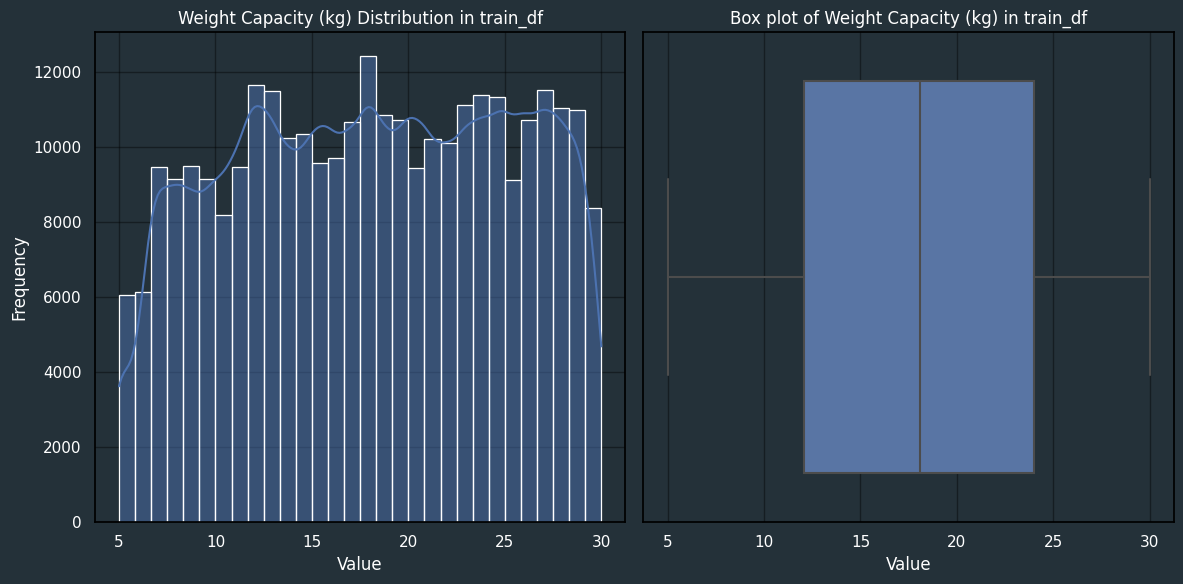

In [9]:
# Adjust the figure and axes creation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram plot
sns.histplot(train_df['Weight Capacity (kg)'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Weight Capacity (kg) Distribution in train_df', color='white')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(x=train_df['Weight Capacity (kg)'], ax=axes[1])
axes[1].set_title('Box plot of Weight Capacity (kg) in train_df', color='white')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

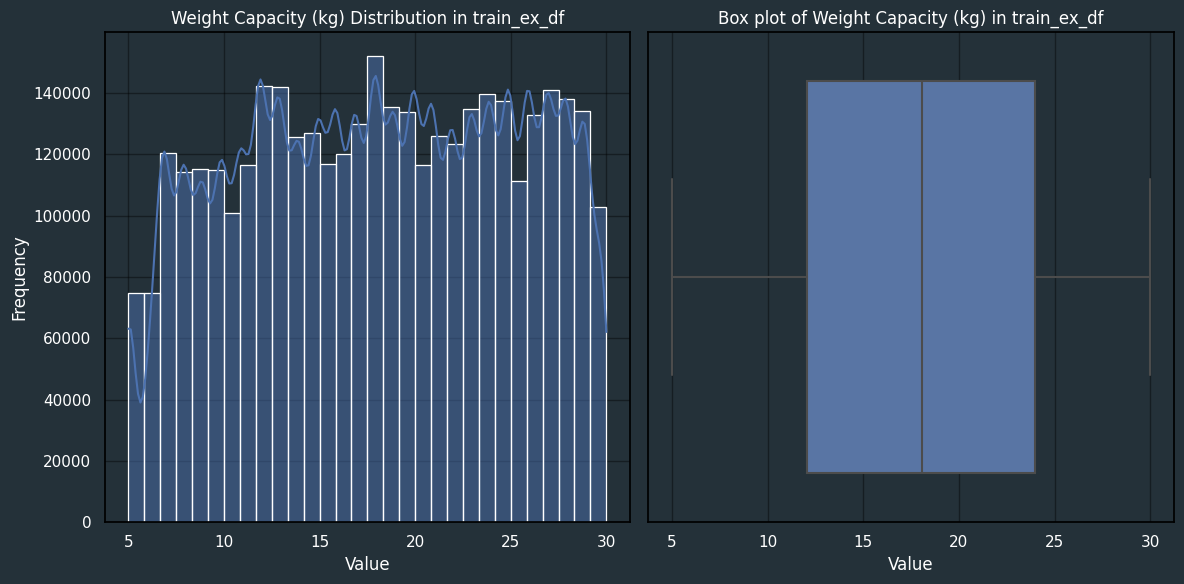

In [10]:
# Adjust the figure and axes creation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram plot
sns.histplot(train_ex_df['Weight Capacity (kg)'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Weight Capacity (kg) Distribution in train_ex_df', color='white')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(x=train_ex_df['Weight Capacity (kg)'], ax=axes[1])
axes[1].set_title('Box plot of Weight Capacity (kg) in train_ex_df', color='white')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

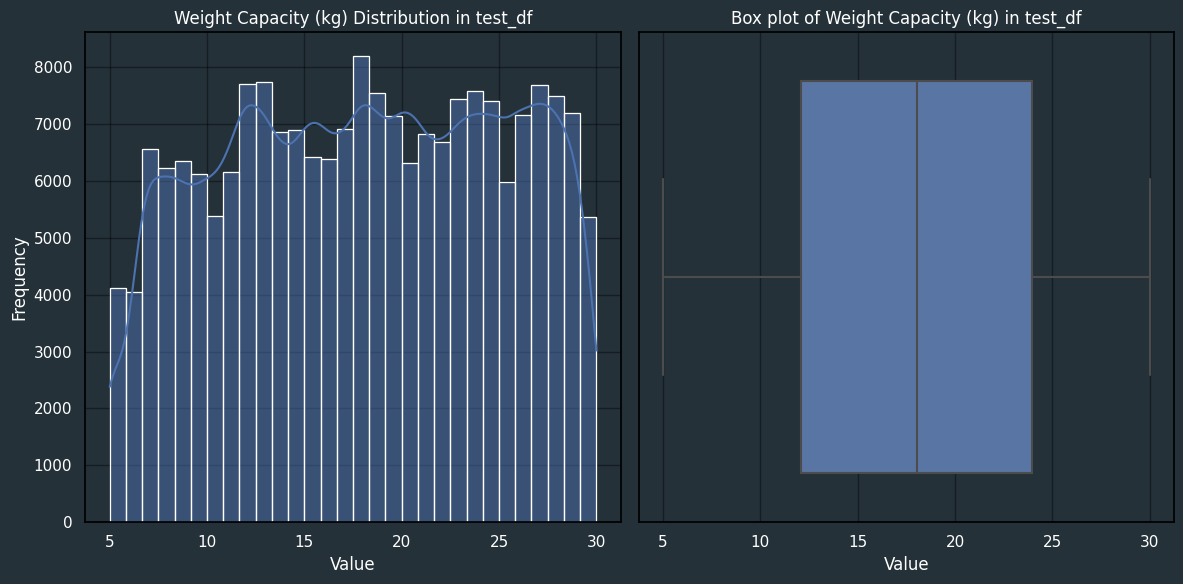

In [11]:
# Adjust the figure and axes creation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram plot
sns.histplot(test_df['Weight Capacity (kg)'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Weight Capacity (kg) Distribution in test_df', color='white')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(x=test_df['Weight Capacity (kg)'], ax=axes[1])
axes[1].set_title('Box plot of Weight Capacity (kg) in test_df', color='white')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

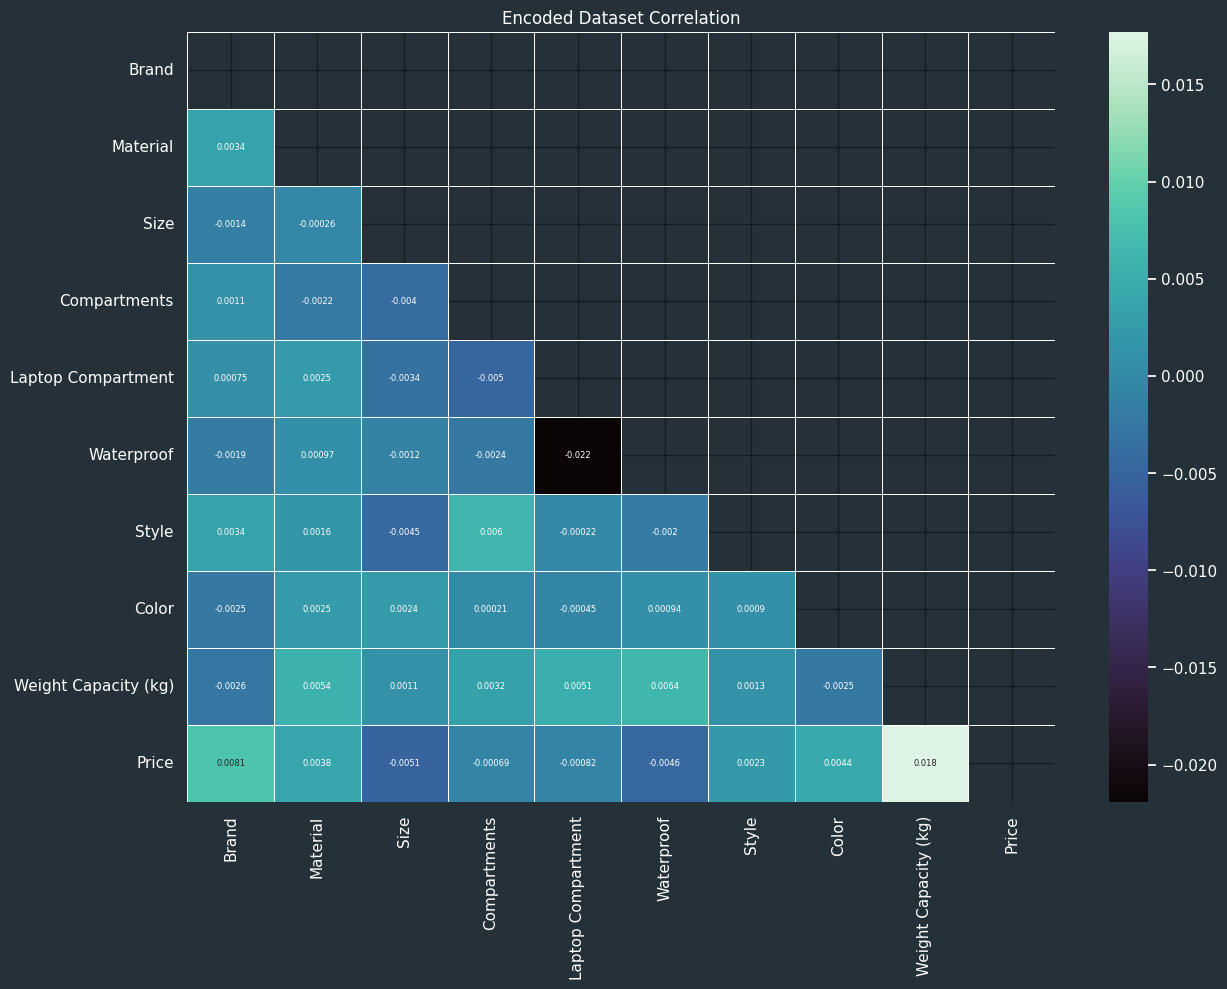

In [12]:
# Create a copy of the dataframe
df_encoded = pd.concat([train_ex_df, train_df], axis=0).reset_index(drop=True).copy()

# Assuming these are your categorical variables, including 'outcome'
categorical_vars = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment','Waterproof', 'Style', 'Color']

# Label encode categorical columns
label_encoders = {}
for column in categorical_vars:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

def plot_correlation_heatmap(df: pd.core.frame.DataFrame, title_name: str = 'Train correlation') -> None:
    excluded_columns = ['id']
    columns_without_excluded = [col for col in df.columns if col not in excluded_columns]
    corr = df[columns_without_excluded].corr()
    
    fig, axes = plt.subplots(figsize=(14, 10))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, linewidths=.5, cmap='mako', annot=True, annot_kws={"size": 6})
    plt.title(title_name, color='white')
    plt.show()

# Plot correlation heatmap for encoded dataframe
plot_correlation_heatmap(df_encoded, 'Encoded Dataset Correlation')

In [13]:
def plot_count(df: pd.core.frame.DataFrame, col: str, title_name: str='Train') -> None:
    # Set background color
    f, ax = plt.subplots(1, 2, figsize=(16, 7))
    plt.subplots_adjust(wspace=0.2)

    s1 = df[col].value_counts()
    N = len(s1)

    outer_sizes = s1
    inner_sizes = s1/N

    colors = sns.color_palette("mako")
    # hex_colors = [matplotlib.colors.to_hex(color) for color in colors]
    # print(hex_colors)
    
    outer_colors = ['#2e1e3b', '#413d7b', '#37659e', '#348fa7', '#40b7ad', '#8bdab2']
    inner_colors = ['#2e1e3b', '#413d7b', '#37659e', '#348fa7', '#40b7ad', '#8bdab2']
    #inner_colors = ['#59b3a3',] #'#433C64']

    ax[0].pie(
        outer_sizes,colors=outer_colors, 
        labels=s1.index.tolist(), 
        startangle=90, frame=True, radius=1.3, 
        explode=([0.05]*(N-1) + [.3]),
        wedgeprops={'linewidth' : 1, 'edgecolor' : 'black'}, 
        textprops={'fontsize': 12, 'weight': 'bold', 'color': 'white'}
    )

    textprops = {
        'size': 13, 
        'weight': 'bold', 
        'color': 'white'
    }

    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%', explode=([.1]*(N-1) + [.3]),
        pctdistance=0.8, textprops=textprops
    )

    center_circle = plt.Circle((0,0), .68, color='black', fc='#243139', linewidth=0)
    ax[0].add_artist(center_circle)

    x = s1
    y = s1.index.tolist()
    sns.barplot(
        x=x, y=y, ax=ax[1],
        palette=colors, orient='horizontal'
    )

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(
        axis='x',         
        which='both',      
        bottom=False,       
        labelbottom=False
    )

    for i, v in enumerate(s1):
        ax[1].text(v, i+0.1, str(v), color='white', fontweight='bold', fontsize=12)

    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel(col, fontweight="bold", color='white')
    ax[1].set_ylabel('count', fontweight="bold", color='white')

    f.suptitle(f'{title_name}', fontsize=14, fontweight='bold', color='white')
    plt.tight_layout() 
    plt.show()

In [14]:
train_tg = pd.concat([train_ex_df, train_df], axis=0).reset_index(drop=True).copy()
#train_tg = train_df.reset_index(drop=True).copy()
train_tg.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Under Armour,Canvas,Small,10.0,Yes,Yes,Tote,Blue,23.882052,114.11068
1,Puma,Polyester,Small,4.0,No,Yes,Backpack,Green,11.869095,129.74972
2,Jansport,Polyester,Small,8.0,Yes,Yes,Tote,Red,8.092302,21.37370
3,Nike,Nylon,Large,7.0,No,No,Messenger,Pink,7.719581,48.09209
4,Nike,Leather,Large,9.0,No,Yes,Tote,Green,22.741826,77.32461


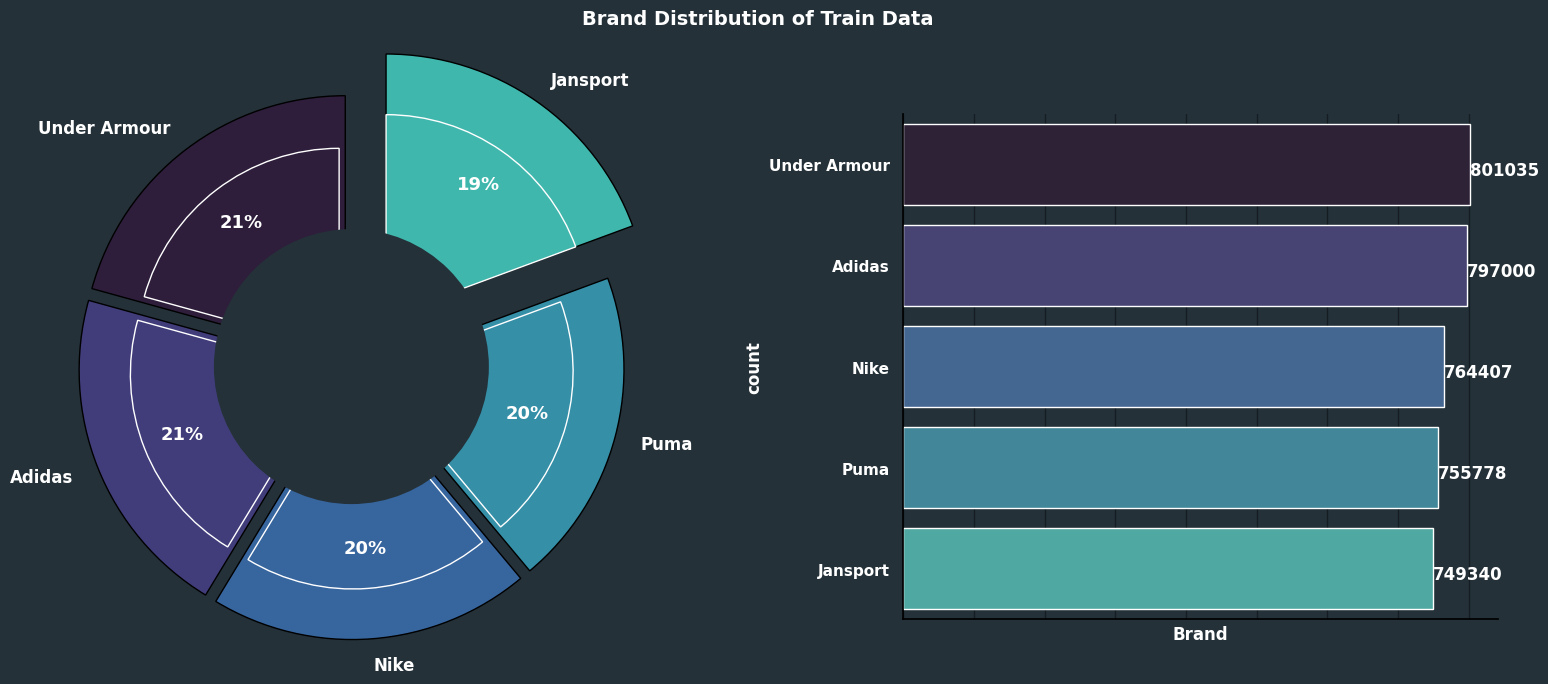

In [15]:
plot_count(train_tg, 'Brand', 'Brand Distribution of Train Data')

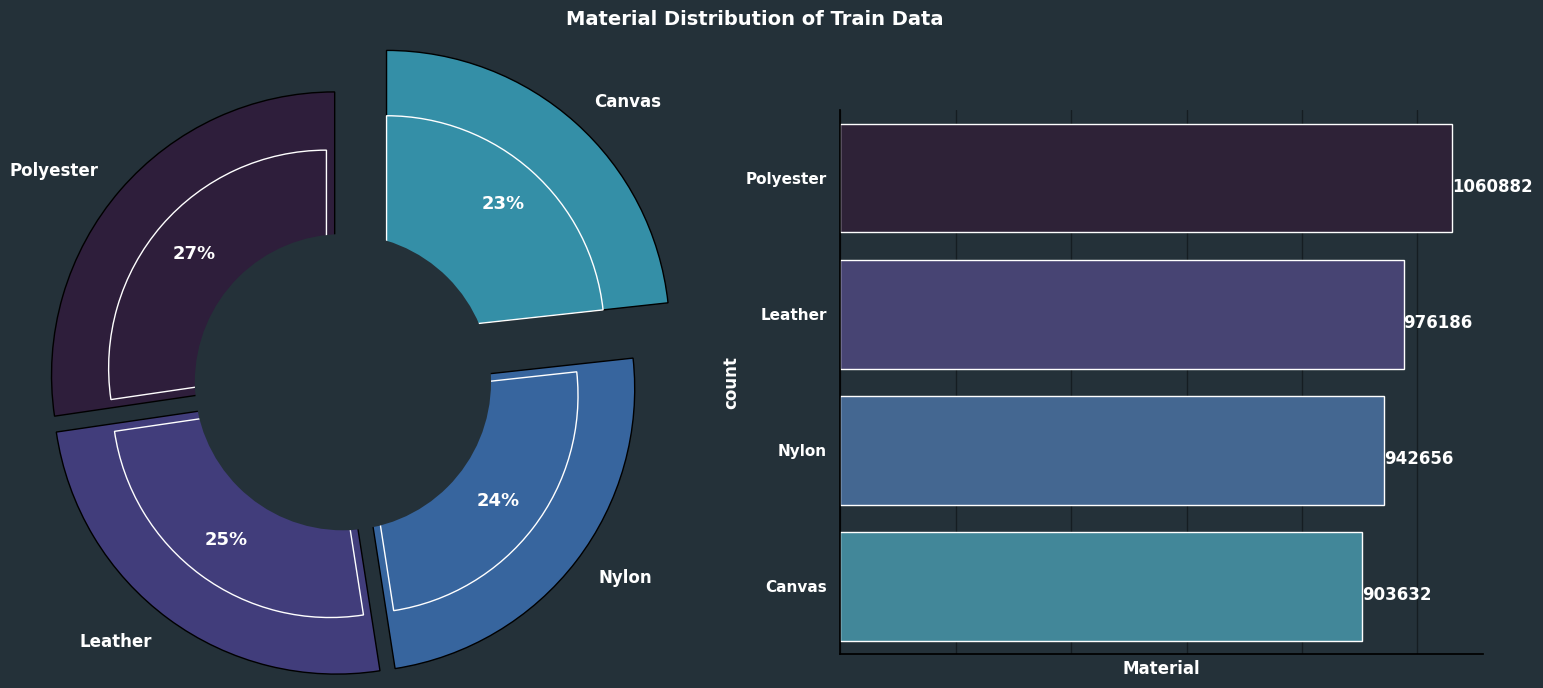

In [16]:
plot_count(train_tg, 'Material', 'Material Distribution of Train Data')

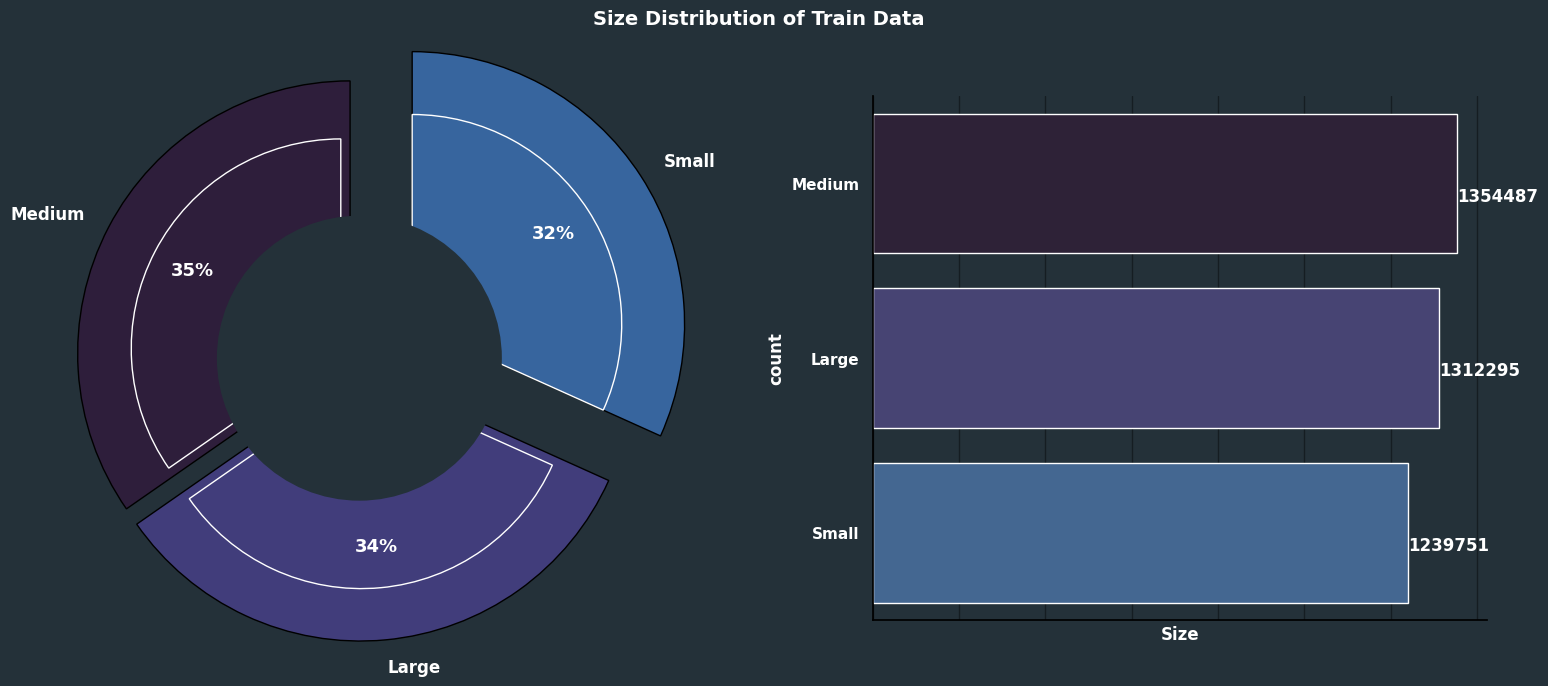

In [17]:
plot_count(train_tg, 'Size', 'Size Distribution of Train Data')

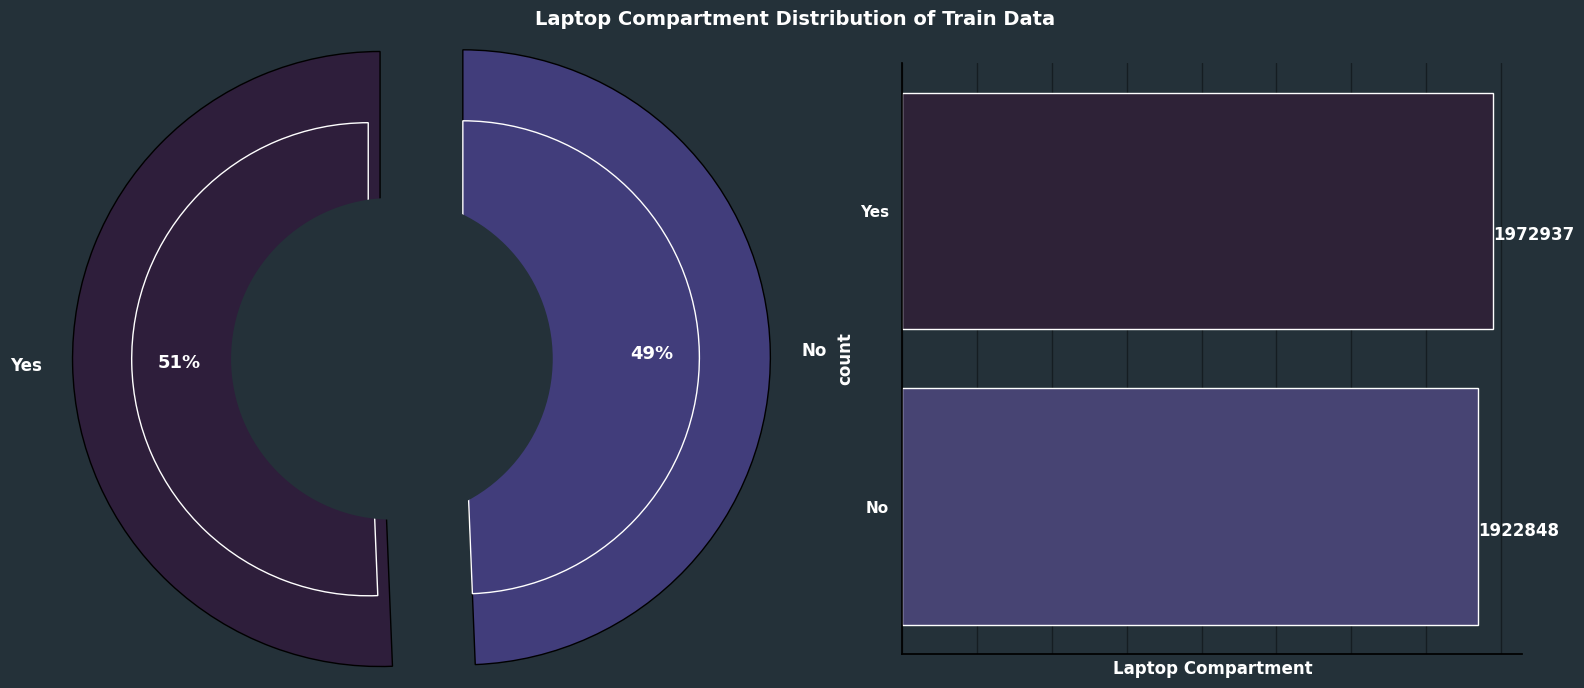

In [18]:
plot_count(train_tg, 'Laptop Compartment', 'Laptop Compartment Distribution of Train Data')

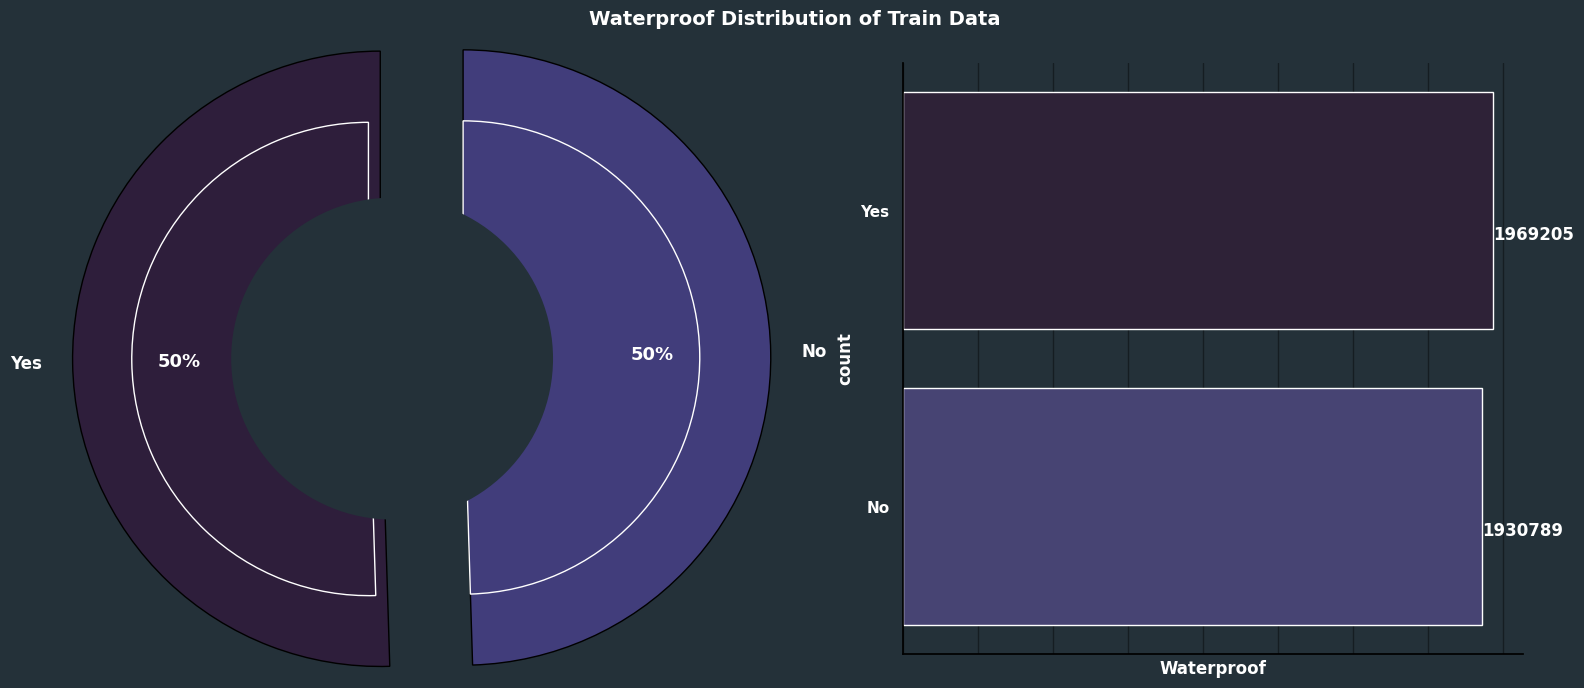

In [19]:
plot_count(train_tg, 'Waterproof', 'Waterproof Distribution of Train Data')

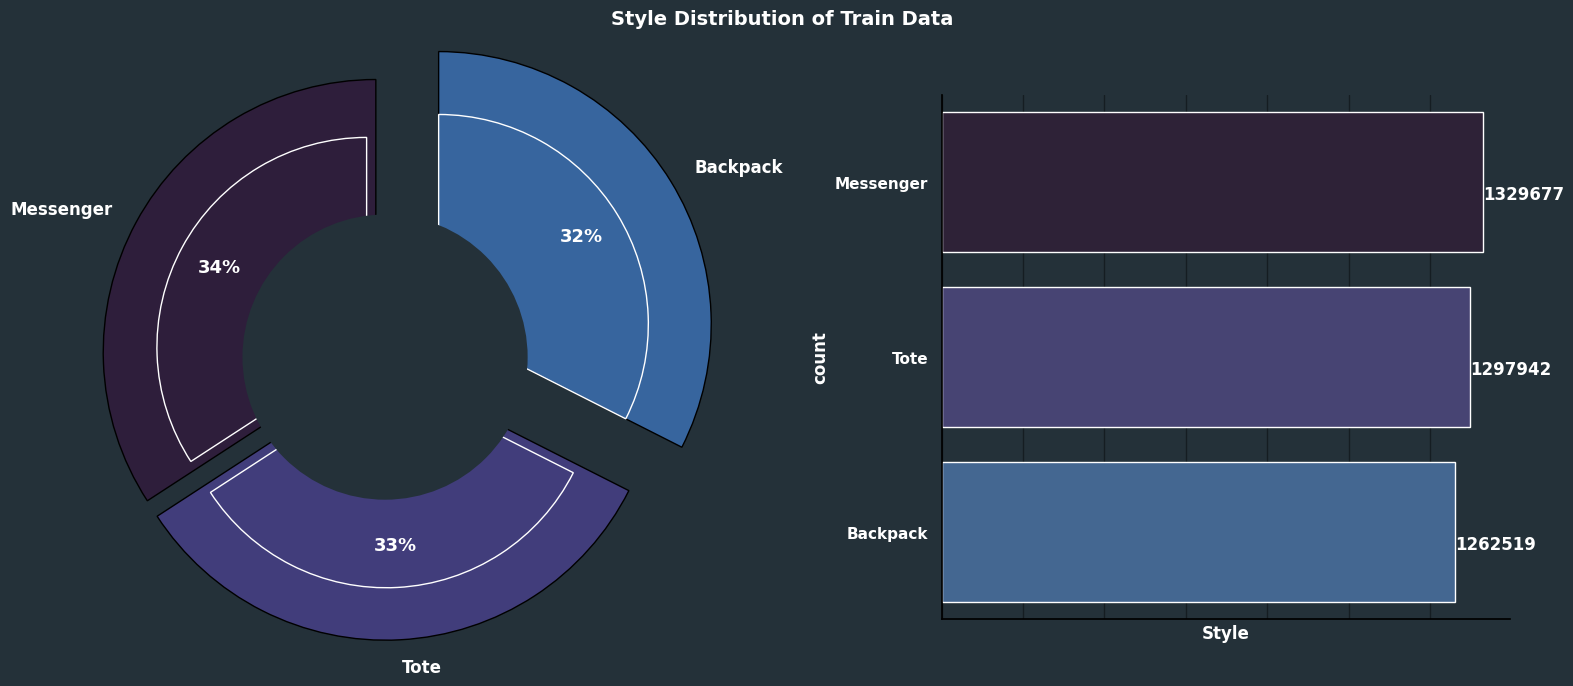

In [20]:
plot_count(train_tg, 'Style', 'Style Distribution of Train Data')

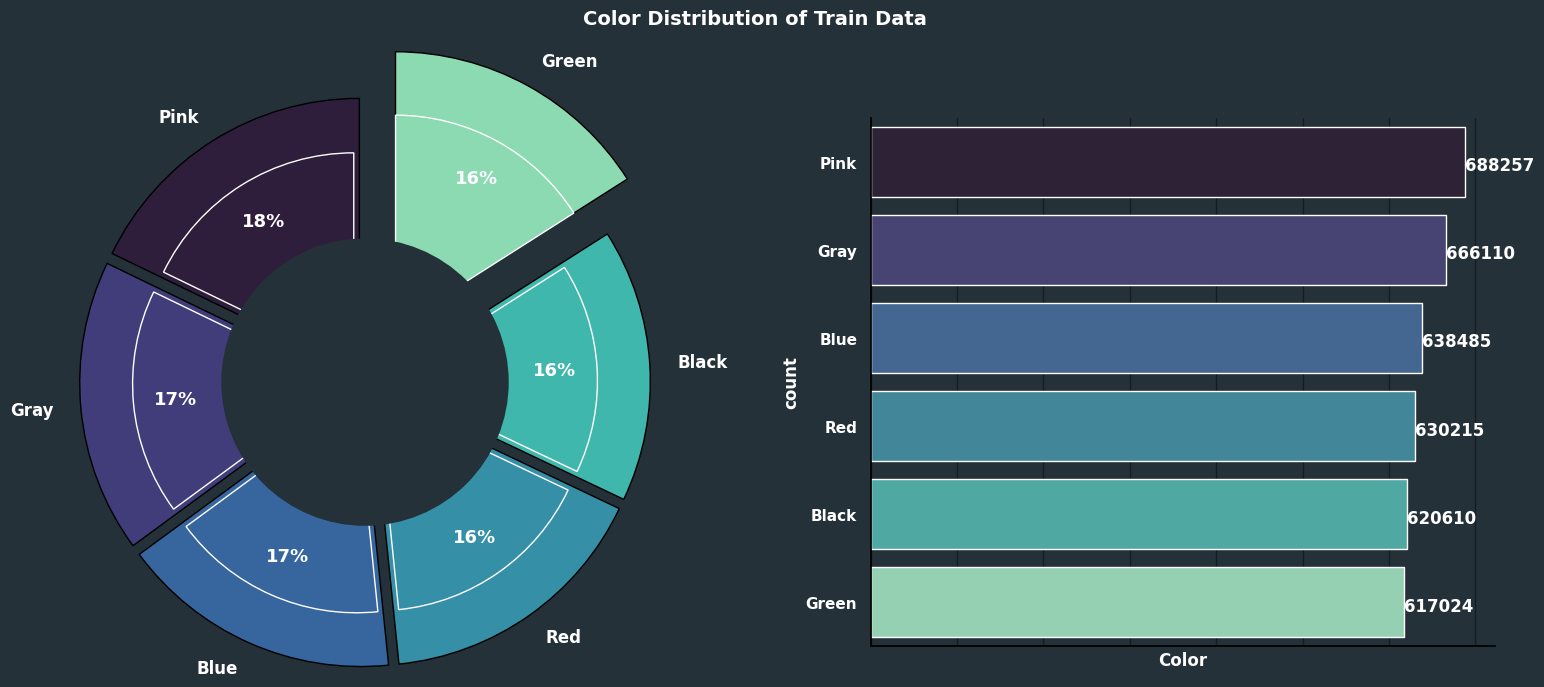

In [21]:
plot_count(train_tg, 'Color', 'Color Distribution of Train Data')

# <p style="background-color:#E6F7FF; font-family:'Comic Sans MS', cursive; font-weight:bold; color:#1192AA; font-size:100%; text-align:center; border: 1px solid #003366; border-radius:10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 51, 102, 0.2);">📜  Data Preprocessing</p>

In [22]:
# Define imputation strategies
categorical_features = ["Brand", "Material", "Size", "Laptop Compartment", "Waterproof", "Style", "Color"]
numerical_features = ["Weight Capacity (kg)"]

# Fill categorical missing values with mode (most frequent value)
for col in categorical_features:
    train_tg[col].fillna(train_tg[col].mode()[0], inplace=True)
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)

# Fill numerical missing values with median
for col in numerical_features:
    train_tg[col].fillna(train_tg[col].median(), inplace=True)
    test_df[col].fillna(test_df[col].median(), inplace=True)

In [23]:
# Calculate aggregated statistics for each brand in training data
brand_stats = train_tg.groupby("Brand")["Price"].agg(["mean", "median", "std"]).reset_index()
brand_stats.columns = ["Brand", "Brand_mean_price", "Brand_median_price", "Brand_std_price"]

# Merge aggregated stats to both train and test datasets
train_data = train_tg.merge(brand_stats, on="Brand", how="left")
test_data = test_df.merge(brand_stats, on="Brand", how="left")

# In test_data, if any brand is missing (new brand), you might fill with global stats:
global_mean = train_data["Price"].mean()
global_median = train_data["Price"].median()
global_std = train_data["Price"].std()
test_data["Brand_mean_price"].fillna(global_mean, inplace=True)
test_data["Brand_median_price"].fillna(global_median, inplace=True)
test_data["Brand_std_price"].fillna(global_std, inplace=True)

# Calculate average price per material and create bins
material_avg = train_data.groupby("Material")["Price"].mean().reset_index().rename(columns={"Price": "Material_avg_price"})
train_data = train_data.merge(material_avg, on="Material", how="left")
test_data = test_data.merge(material_avg, on="Material", how="left")

# Bin the materials based on quantiles of average price
material_bins = pd.qcut(train_data["Material_avg_price"], q=3, labels=["Low", "Medium", "High"])
train_data["Material_price_bin"] = material_bins

# For test set, use the same bin edges as training (here, using pd.cut with bins from quantiles)
bin_edges = pd.qcut(train_data["Material_avg_price"], q=3, retbins=True)[1]
test_data["Material_price_bin"] = pd.cut(test_data["Material_avg_price"], bins=bin_edges, labels=["Low", "Medium", "High"], include_lowest=True)

# Convert Labtop Compartment and Waterproof
binary_map = {"Yes": 1, "No": 0}
train_data["Laptop Compartment"] = train_data["Laptop Compartment"].map(binary_map)
test_data["Laptop Compartment"] = test_data["Laptop Compartment"].map(binary_map)
train_data["Waterproof"] = train_data["Waterproof"].map(binary_map)
test_data["Waterproof"] = test_data["Waterproof"].map(binary_map)

# Standardize the weight capacity. Alternatively, you could create bins.
scaler = StandardScaler()
train_data["Weight_Capacity_scaled"] = scaler.fit_transform(train_data[["Weight Capacity (kg)"]])
test_data["Weight_Capacity_scaled"] = scaler.transform(test_data[["Weight Capacity (kg)"]])

In [24]:
# One-hot Encoding:
cat_features_to_encode = ["Brand", "Material", "Size", "Style", "Color", "Material_price_bin"]

# Use pandas get_dummies for simplicity
train_data_encoded = pd.get_dummies(train_data, columns=cat_features_to_encode, drop_first=True)
test_data_encoded = pd.get_dummies(test_data, columns=cat_features_to_encode, drop_first=True)

# Ensure both train and test have the same dummy columns
train_cols = set(train_data_encoded.columns)
test_cols = set(test_data_encoded.columns)
for col in train_cols - test_cols:
    test_data_encoded[col] = 0
for col in test_cols - train_cols:
    train_data_encoded[col] = 0

# Sort columns to maintain consistent order
train_data_encoded = train_data_encoded.sort_index(axis=1)
test_data_encoded = test_data_encoded.sort_index(axis=1)

# Now, your data is ready for model training.
print("Feature engineering and encoding complete!")
print_sl()

Feature engineering and encoding complete!



In [25]:
train = train_data_encoded.copy()

# For testing, ensure the target column is dropped if it exists
if "Price" in test_data_encoded.columns:
    test = test_data_encoded.drop("Price", axis=1)
else:
    test = test_data_encoded.copy()

y_train = train['Price']
X_train = train.drop(['Price'], axis=1)

print("Train and test sets are ready for model training!")
print_sl()

X_train.head()

Train and test sets are ready for model training!



,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Brand_mean_price,Brand_median_price,Brand_std_price,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red,Compartments,Laptop Compartment,Material_Leather,Material_Nylon,Material_Polyester,Material_avg_price,Material_price_bin_High,Material_price_bin_Medium,Size_Medium,Size_Small,Style_Messenger,Style_Tote,Waterproof,Weight Capacity (kg),Weight_Capacity_scaled
0,False,False,False,True,81.918562,81.94855,39.057550,True,False,False,False,False,10.0,1,False,False,False,81.831022,False,True,False,True,False,True,1,23.882052,0.842124
1,False,False,True,False,81.225577,80.37190,39.149583,False,False,True,False,False,4.0,0,False,False,True,81.961818,True,False,False,True,False,False,1,11.869095,-0.880809
2,True,False,False,False,81.777549,81.42694,38.847765,False,False,False,False,True,8.0,1,False,False,True,81.961818,True,False,False,True,False,True,1,8.092302,-1.422487
3,False,True,False,False,81.284804,80.89513,38.900310,False,False,False,True,False,7.0,0,False,True,False,81.071794,False,False,False,False,True,False,0,7.719581,-1.475944
4,False,True,False,False,81.284804,80.89513,38.900310,False,False,True,False,False,9.0,0,True,False,False,80.488749,False,False,False,False,False,True,1,22.741826,0.678589


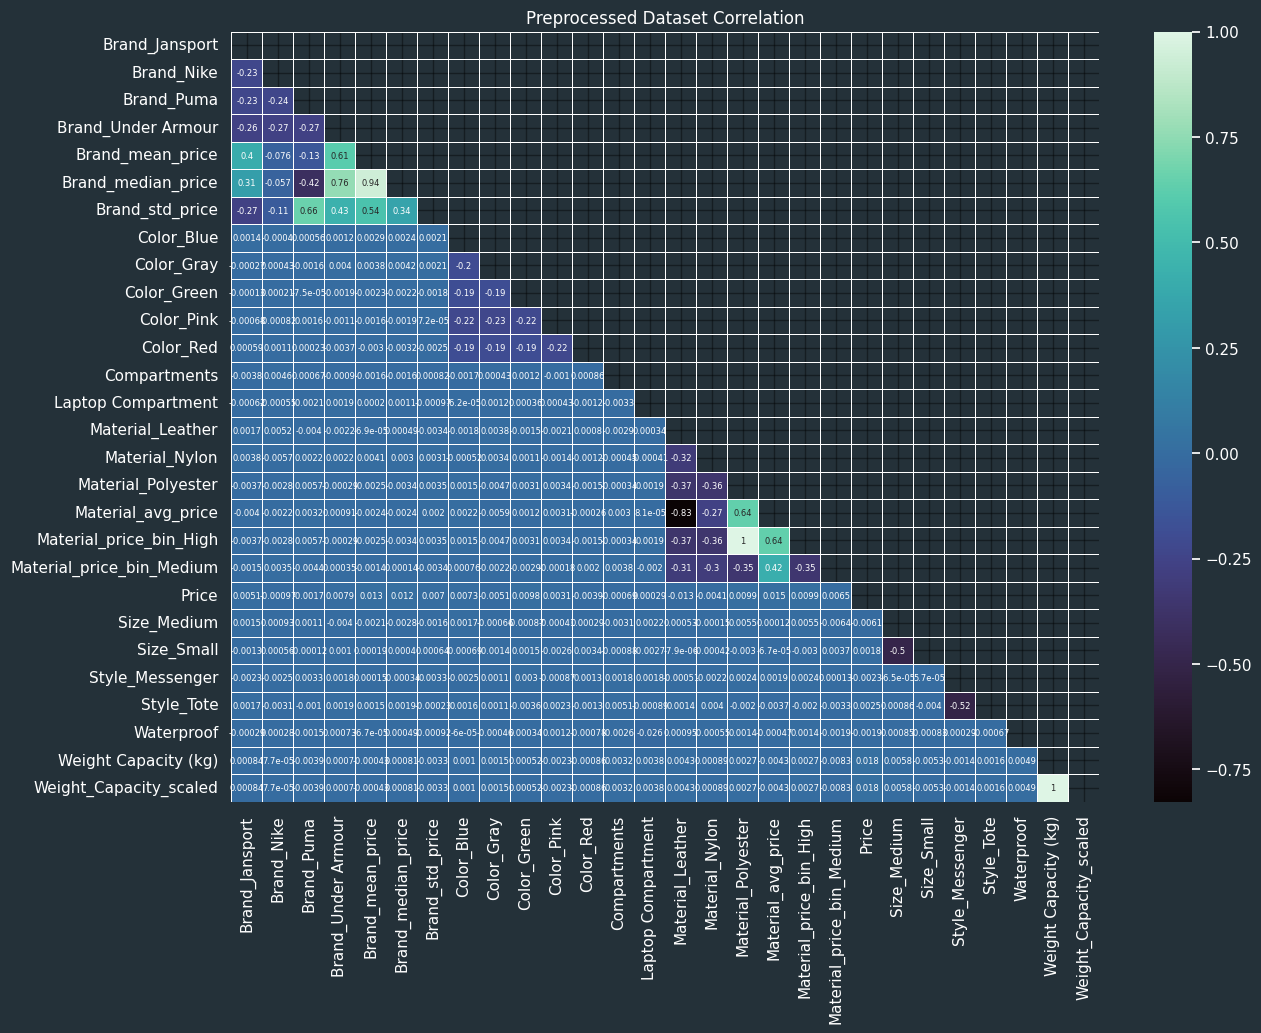

In [26]:
plot_correlation_heatmap(train, 'Preprocessed Dataset Correlation')

# <p style="background-color:#E6F7FF; font-family:'Comic Sans MS', cursive; font-weight:bold; color:#1192AA; font-size:100%; text-align:center; border: 1px solid #003366; border-radius:10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 51, 102, 0.2);">📜 Model Training</p>

In [27]:
# NOT RELEVANT FOR NOW

class Regressor:
    def __init__(self, n_estimators=100, device="cpu", random_state=0):
        self.n_estimators = n_estimators
        self.device = device
        self.random_state = random_state
        self.models = self._define_model()
        self.models_name = list(self._define_model().keys())
        self.len_models = len(self.models)
        
    def _define_model(self):
        
        xgb_params = {
            'n_estimators': self.n_estimators,
            'max_depth': 7,
            'learning_rate': 0.0116,
            'colsample_bytree': 1,
            'subsample': 0.6085,
            'min_child_weight': 9,
            'reg_lambda': 4.879e-07,
            'max_bin': 431,
            'n_jobs': -1,
            'eval_metric': 'mae',
            'objective': "reg:squarederror",
            'verbosity': 0,
            'random_state': self.random_state,
        }
        if self.device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'
        xgb_exact_params = xgb_params.copy()
        xgb_exact_params['tree_method'] = 'exact'
        xgb_approx_params = xgb_params.copy()
        xgb_approx_params['tree_method'] = 'approx'
        
        lgb_params = {
            'n_estimators': self.n_estimators,
            'max_depth': 7,
            "num_leaves": 16,
            'learning_rate': 0.05,
            'subsample': 0.60,
            'colsample_bytree': 1,
            'reg_alpha': 0.25,
            'reg_lambda': 5e-07,
            'objective': 'regression_l1',
            'metric': 'mean_squared_error',
            'boosting_type': 'gbdt',
            'device': self.device,
            'verbosity': -1,
            'random_state': self.random_state
        }
        lgb2_params = {
            'n_estimators': self.n_estimators,
            'num_leaves': 93, 
            'min_child_samples': 20, 
            'learning_rate': 0.05533790147941807, 
            'colsample_bytree': 0.8809128870084636, 
            'reg_alpha': 0.0009765625, 
            'reg_lambda': 0.015589408048174165,
            'objective': 'regression_l1',
            'metric': 'mean_absolute_error',
            'boosting_type': 'gbdt',
            'device': self.device,
            'random_state': self.random_state
        }
        lgb3_params = {
            'n_estimators': self.n_estimators,
            'num_leaves': 45,
            'max_depth': 13,
            'learning_rate': 0.0684383311038932,
            'subsample': 0.5758412171285148,
            'colsample_bytree': 0.8599714680300794,
            'reg_lambda': 1.597717830931487e-08,
            'objective': 'regression_l1',
            'metric': 'mean_absolute_error',
            'boosting_type': 'gbdt',
            'device': self.device,
            'random_state': self.random_state,
            'force_col_wise': True
        }
        lgb_goss_params = lgb_params.copy()
        lgb_goss_params['boosting_type'] = 'goss'
        lgb_dart_params = lgb_params.copy()
        lgb_dart_params['boosting_type'] = 'dart'
        lgb_dart_params['n_estimators'] = 500
                
        cb_params = {
            'iterations': self.n_estimators,
            'depth': 8,
            'learning_rate': 0.01,
            'l2_leaf_reg': 0.7,
            'random_strength': 0.2,
            'max_bin': 200,
            'od_wait': 65,
            'one_hot_max_size': 70,
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'RMSE',
            'loss_function': 'RMSE',
            'task_type': self.device.upper(),
            'random_state': self.random_state
        }
        cb2_params = {
            'iterations': self.n_estimators,
            'depth': 9, 
            'learning_rate': 0.456,
            'l2_leaf_reg': 8.41,
            'random_strength': 0.18,
            'max_bin': 225, 
            'od_wait': 58, 
            'grow_policy': 'Lossguide',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'MAE',
            'loss_function': 'MAE',
            'task_type': self.device.upper(),
            'random_state': self.random_state
        }
        cb3_params = {
            'n_estimators': self.n_estimators,
            'depth': 11,
            'learning_rate': 0.08827842054729117,
            'l2_leaf_reg': 4.8351074756668864e-05,
            'random_strength': 0.21306687539993183,
            'max_bin': 483,
            'od_wait': 97,
            'grow_policy': 'Lossguide',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'MAE',
            'loss_function': 'MAE',
            'task_type': self.device.upper(),
            'random_state': self.random_state,
            'silent': True
        }
        cb_sym_params = cb_params.copy()
        cb_sym_params['grow_policy'] = 'SymmetricTree'
        cb_loss_params = cb_params.copy()
        cb_loss_params['grow_policy'] = 'Lossguide'
        
        models = {
            #"xgb": xgb.XGBRegressor(**xgb_params),
            #"xgb_exact": xgb.XGBRegressor(**xgb_exact_params),
            #"xgb_approx": xgb.XGBRegressor(**xgb_approx_params),
            #"lgb": lgb.LGBMRegressor(**lgb_params),
            "lgb_": lgb.LGBMRegressor(verbosity=-1),
            #"lgb2": lgb.LGBMRegressor(**lgb2_params),
            #"lgb3": lgb.LGBMRegressor(**lgb3_params),
            "cat": CatBoostRegressor(**cb_params),
            #"cat2": CatBoostRegressor(**cb2_params),
            #"cat3": CatBoostRegressor(**cb3_params),
            #"cat_sym": CatBoostRegressor(**cb_sym_params),
            #"cat_loss": CatBoostRegressor(**cb_loss_params),
            #"Ridge": RidgeCV(),
            #"Lasso": LassoCV(),
            #"RandomForestRegressor": RandomForestRegressor(n_estimators=200, random_state=self.random_state, n_jobs=-1),
            #"PLSRegression": PLSRegression(n_components=10, max_iter=2000),
            #"PassiveAggressiveRegressor": PassiveAggressiveRegressor(max_iter=3000, tol=1e-3, n_iter_no_change=30, random_state=self.random_state),
            #"GradientBoostingRegressor": GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05, loss="absolute_error", random_state=self.random_state),
            #"HistGradientBoostingRegressor": HistGradientBoostingRegressor(max_iter=self.n_estimators, learning_rate=0.01, loss="absolute_error", n_iter_no_change=300,random_state=self.random_state),
            #"ARDRegression": ARDRegression(n_iter=1000),
            #"HuberRegressor": HuberRegressor(max_iter=3000),
            #"KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
        }
        
        return models

In [28]:
import numpy as np
import gc
import time
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import lightgbm as lgb
import catboost as cb

# Configurations
kfold = True
n_splits = 5 if kfold else 1
random_state = 42
n_estimators = 250
early_stopping_rounds = 111
verbose = False

# Assuming X_train, y_train, and test are already defined
# Define k-fold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

# Arrays to store predictions
test_pred_total = np.zeros(test.shape[0])
oof_pred_total = np.zeros(X_train.shape[0])
ensemble_scores = []

fold_idx = 0
start_time = time.time()

print("Starting baseline training...")

for train_index, val_index in kf.split(X_train):
    fold_start_time = time.time()
    fold_idx += 1
    print(f"\n=== Fold {fold_idx} ===")
    
    X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # -----------------
    # LightGBM Model
    # -----------------
    lgb_train = lgb.Dataset(X_tr, label=y_tr)
    lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)
    lgb_params = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'seed': random_state,
        'n_estimators': 500,
        'max_depth': 7,
        "num_leaves": 16,
        'learning_rate': 0.05,
        'subsample': 0.60,
        'colsample_bytree': 1,
        'reg_alpha': 0.25,
        'reg_lambda': 5e-07,
        'boosting_type': 'gbdt'
    }

    print("Training LightGBM...")
    lgb_model = lgb.train(
        lgb_params, 
        lgb_train, 
        num_boost_round=n_estimators, 
        valid_sets=[lgb_val],
        valid_names=['valid'],
        callbacks=[lgb.early_stopping(stopping_rounds=early_stopping_rounds, verbose=verbose)]
    )
    lgb_val_pred = lgb_model.predict(X_val, num_iteration=lgb_model.best_iteration)
    lgb_test_pred = lgb_model.predict(test, num_iteration=lgb_model.best_iteration)
    
    # -----------------
    # CatBoost Model
    # -----------------
    cat_params = {
        'learning_rate': 0.5,
        'loss_function': 'RMSE',
        'random_seed': random_state,
        'verbose': verbose,
        'early_stopping_rounds': early_stopping_rounds,
        'n_estimators' : 500,
        'depth': 9,
        'min_data_in_leaf': 31,
        'l2_leaf_reg': 8.6747996355635,
        'random_strength': 0.10973470839735683,
        'learning_rate': 0.01,
    }
    
    print("Training CatBoost...")
    cat_model = cb.CatBoostRegressor(**cat_params)
    cat_model.fit(X_tr, y_tr, eval_set=(X_val, y_val), use_best_model=True, verbose=verbose)
    cat_val_pred = cat_model.predict(X_val)
    cat_test_pred = cat_model.predict(test)
    
    # -----------------
    # Simple Ensemble: Average Predictions
    # -----------------
    val_preds = (lgb_val_pred + cat_val_pred) / 2.0
    test_preds = (lgb_test_pred + cat_test_pred) / 2.0
    
    # Store predictions
    oof_pred_total[val_index] = val_preds
    test_pred_total += test_preds / n_splits
    
    # Calculate RMSE for current fold
    fold_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
    ensemble_scores.append(fold_rmse)
    print(f"Fold {fold_idx} RMSE: {fold_rmse:.5f} (Fold time: {time.time()-fold_start_time:.1f} sec)")
    
    gc.collect()

total_time = time.time() - start_time
print(f"\nBaseline training complete. Total time: {total_time/60:.2f} minutes.")
print(f"Average RMSE: {np.mean(ensemble_scores):.5f}")

# test_pred_total holds the ensemble test predictions


Starting baseline training...

=== Fold 1 ===
Training LightGBM...
Training CatBoost...
Fold 1 RMSE: 38.88771 (Fold time: 216.4 sec)

=== Fold 2 ===
Training LightGBM...
Training CatBoost...
Fold 2 RMSE: 38.90589 (Fold time: 216.3 sec)

=== Fold 3 ===
Training LightGBM...
Training CatBoost...
Fold 3 RMSE: 38.89340 (Fold time: 215.8 sec)

=== Fold 4 ===
Training LightGBM...
Training CatBoost...
Fold 4 RMSE: 38.91090 (Fold time: 217.2 sec)

=== Fold 5 ===
Training LightGBM...
Training CatBoost...
Fold 5 RMSE: 38.89192 (Fold time: 216.4 sec)

Baseline training complete. Total time: 18.05 minutes.
Average RMSE: 38.89796


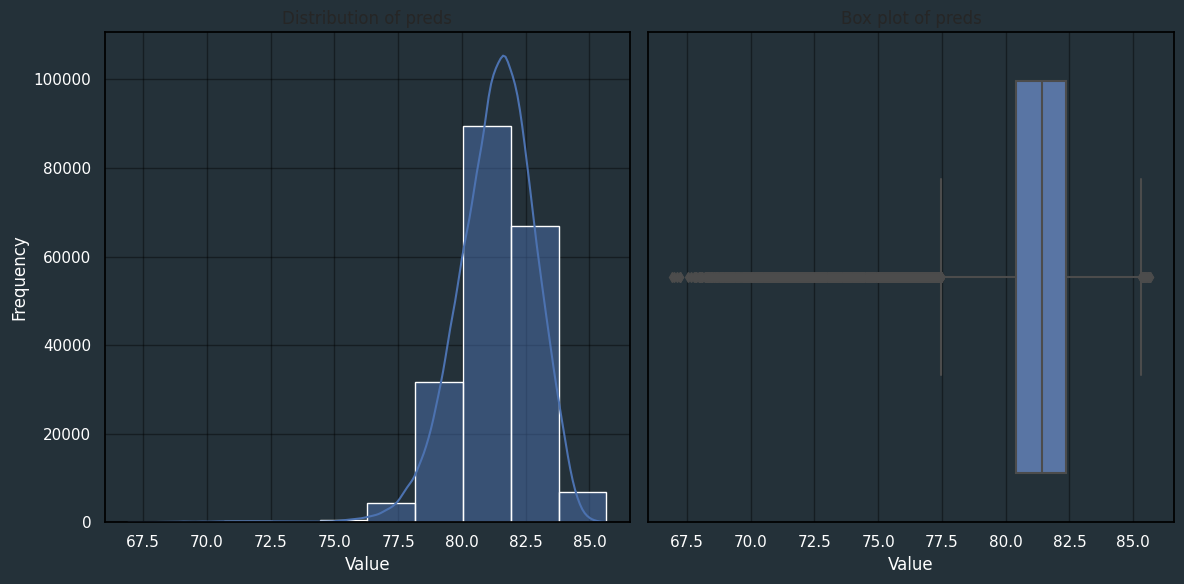

In [29]:
# Adjust the figure and axes creation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram plot
sns.histplot(test_pred_total, bins=10, kde=True, ax=axes[0])
axes[0].set_title('Distribution of preds')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(x=test_pred_total, ax=axes[1])
axes[1].set_title('Box plot of preds')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [30]:
sub = pd.read_csv(sub_PATH)
sub[f'{target}'] = test_pred_total

sub.to_csv('submission.csv', index=False)
sub

,id,Price
0,300000,80.737366
1,300001,82.296006
2,300002,82.273126
3,300003,80.877375
4,300004,78.442919
...,...,...
199995,499995,79.776817
199996,499996,76.272821
199997,499997,82.707154
199998,499998,81.712291
